In [1]:
from duckduckgo_search import ddg_images
from fastcore.all import *
#Importing required libraries

In [2]:
# Create a search images function
def search_images(term,max_images=30):
    print(f"Searching for '{term}'...")
    return L(ddg_images(term,max_results=max_images)).itemgot('image')

In [3]:
urls = search_images('car photos',max_images=1)
urls[0]


Searching for 'car photos'...


'http://digitalsynopsis.com/wp-content/uploads/2014/06/supercar-wallpapers-bugatti-3.jpg'

In [6]:
#Download a demo image
from fastdownload import download_url
dest = 'car.jpg'
download_url(urls[0],dest,show_progress=False)


Path('car.jpg')

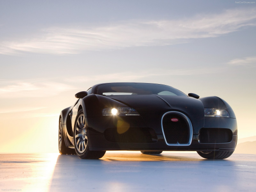

In [7]:
#View the image
from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'car crash'...


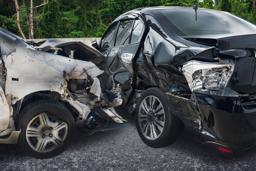

In [9]:
download_url(search_images('car crash', max_images=1)[0], 'crash.jpg', show_progress=False)
Image.open('crash.jpg').to_thumb(256,256)

In [11]:
searches ='car','car crash'
path = Path('crash_or_not')
from time import sleep

for o in searches:
    dest = path/o
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest,urls=search_images(f'{o} photo'))
    sleep(10)
    download_images(dest,urls=search_images(f'{o} parked'))
    sleep(10)
    download_images(dest,urls=search_images(f'{o} traffic'))
    sleep(10)
    resize_image(path/o,max_size=400,dest=path/o)
    

Searching for 'car photo'...
Searching for 'car parked'...
Searching for 'car traffic'...
Searching for 'car crash photo'...
Searching for 'car crash parked'...
Searching for 'car crash traffic'...


In [12]:
#remove failed images
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

7

In [13]:
dls = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items =get_image_files,
    splitter= RandomSplitter(valid_pct=0.2,seed=42),
    get_y = parent_label,
    item_tfms= [Resize(192,method='squish')]

).dataloaders(path,bs=32)

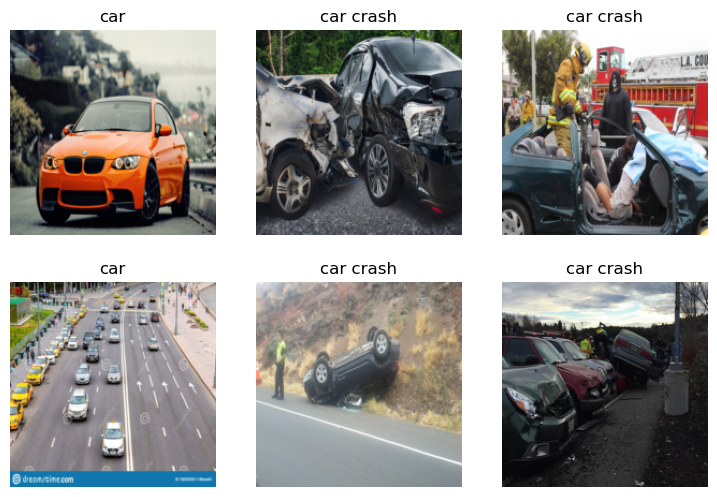

In [14]:
#Seeing the datablock
dls.show_batch(max_n=6)

ResNet-18 is a convolutional neural network that is 18 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database 

In [15]:
learn =  vision_learner(dls,resnet18,metrics=error_rate)
learn.fine_tune(3)    

/home/pranavajay/anaconda3/envs/pygame_env/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/pranavajay/anaconda3/envs/pygame_env/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/pranavajay/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:17<00:00, 2.70MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.425936,1.133021,0.300000,00:17


epoch,train_loss,valid_loss,error_rate,time
0,0.547677,1.198765,0.333333,00:14
1,0.360937,1.090411,0.300000,00:15
2,0.286319,0.766768,0.200000,00:12


In [19]:
is_car,_,probs = learn.predict(PILImage.create('car.jpg'))
print(f"This is a : {is_car}")
print(f"Probability it's a car: {probs[0]:.4f}")

This is a : car
Probability it's a car: 0.7013
